In [30]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# importing the data

In [5]:
df= pd.read_csv(r"C:\Users\dell\Downloads\spam.csv")

In [6]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

# Ham

In [17]:
ham_words = ' '.join(df[df['Category']== 'ham']['Message'].values)

In [13]:
pip install WordCloud

  Obtaining dependency information for WordCloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.2 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
from wordcloud import WordCloud

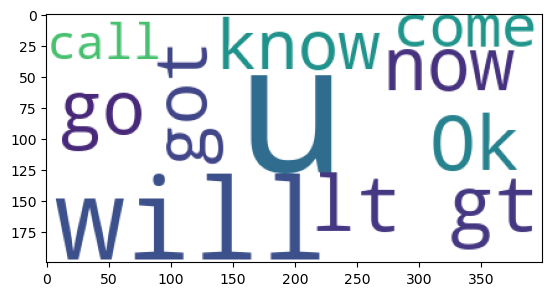

In [21]:
ham_plot = WordCloud(max_words=10,background_color='white').generate(ham_words)
plt.imshow(ham_plot)

# spam

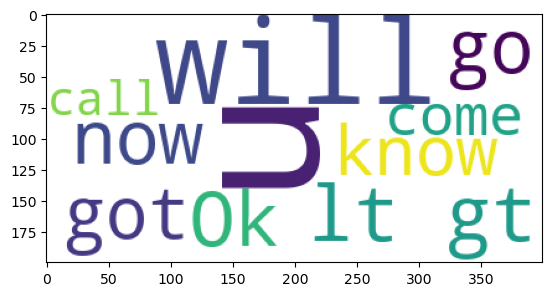

In [25]:
spam_words = ' '.join(df[df['Category']== 'spam']['Message'].values)
spam_plot = WordCloud(max_words=10,background_color='white').generate(ham_words)
plt.imshow(spam_plot)

<Axes: xlabel='Category'>

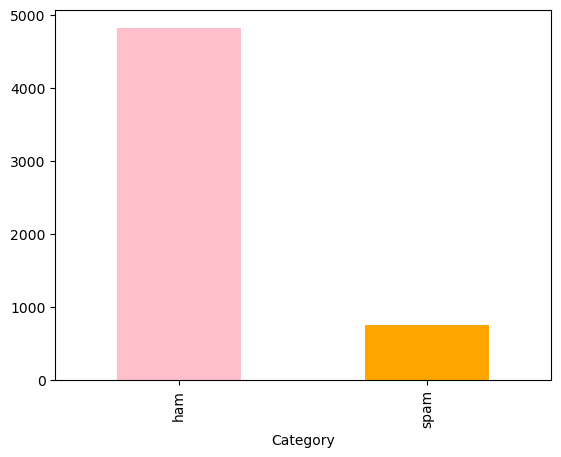

In [27]:
df['Category'].value_counts().plot(kind = 'bar',color = ['pink','orange'])

# Bags of words

In [47]:
X = df.drop('Category',axis = 1)

In [54]:
bow = CountVectorizer(stop_words='english')

In [60]:
bow.fit(df['Message'])
X = bow.transform(df['Message']).toarray()
y = df['Category']

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=23)

# KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [64]:

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.9022421524663677

## Naive Bays

In [66]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train,y_train)
y_pred = nb.predict(X_test)
accuracy_score(y_test,y_pred)

0.9820627802690582

# pickling

In [80]:
import pickle

In [81]:
pickle.dump(nb,open("model.pkl","wb"))

In [90]:
pickle.dump(bow,open('model1.pkl',"wb"))

In [88]:
model = pickle.load(open("model.pkl","rb"))


## deployement

In [74]:
email = input("Enter the email ID: ")
data = bow.transform([email])
nb.predict(data)[0]

Enter the email ID: hlo


'ham'